# The rv_histogram plot in the paper

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# import starspot as ss

plotpar = {'axes.labelsize': 30,
           'font.size': 22,
           'legend.fontsize': 10,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the data.

In [3]:
# df0 = pd.read_csv("../kepler_kinematics/gaia_kepler_lamost.csv")
df0 = pd.read_csv("../kepler_kinematics/data.csv")
print(len(df0))
f = np.isfinite(df0.color_teffs.values) & (df0.color_teffs.values > 2000) & (df0.color_teffs.values < 10000)
df = df0.iloc[f]
print("removing stars with weird teffs")
print(len(df))

150278
removing stars with weird teffs
149993


In [4]:
m = np.isfinite(df.rv.values)

minimum teff star with RV =  3144.0356025005176
0.46426116838487974 of stars cooler than 5000 K have RVs
0.21539058019595647 of stars hotter than 5000 K have RVs
faintest star with RV =  16.930299758911133
Median mag of stars with RVs = 12.86736297607422
Median mag of stars without RVs = 15.014864444732666
1628 stars with RVs fainter than 15th


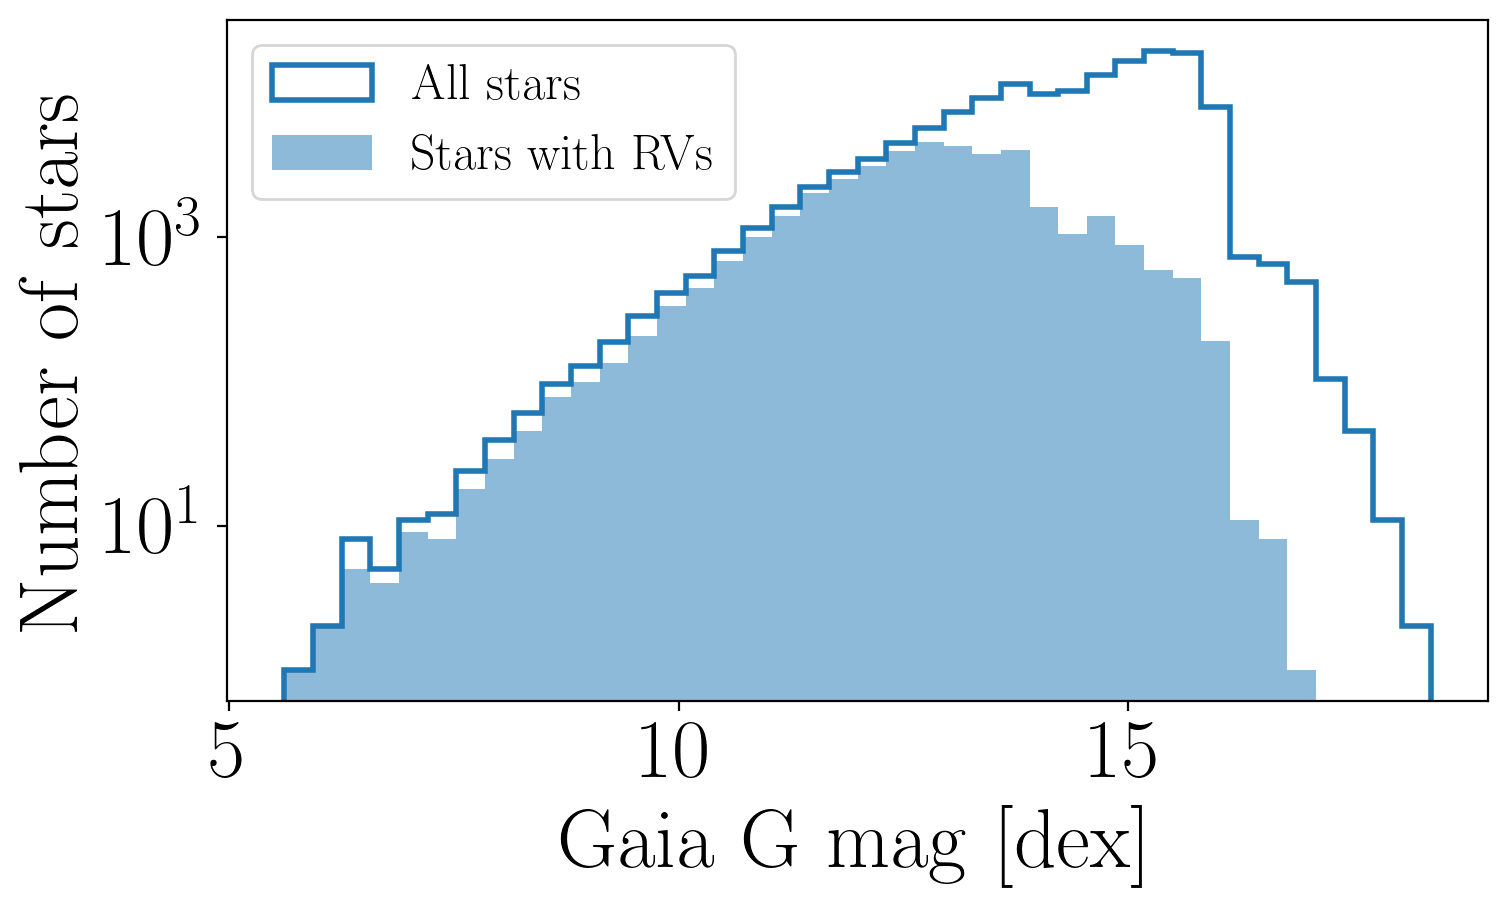

In [10]:
fig = plt.figure(figsize=(8, 5), dpi=200)

ax1 = fig.add_subplot(111)
n, bins = np.histogram(df.phot_g_mean_mag, 40)
# ax1.step(bins[:-1], n, color="C0", lw="2", where="post", label="$\mathrm{All~stars}$");
h = ax1.hist(df.phot_g_mean_mag, 40, color="C0", histtype="step", lw="2", label="$\mathrm{All~stars}$");
ax1.hist(df.phot_g_mean_mag.values[m], bins=h[1], color="C0", alpha=.5,
         label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(df.phot_g_mean_mag.values, bins=bins)
ax1.set_xlabel("$\mathrm{Gaia~G~mag~[dex]}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
ax1.legend(loc="upper left", fontsize=18);

plt.tight_layout()
plt.savefig("../plots/rv_histogram")
plt.savefig("../paper/rv_histogram.pdf")

print("minimum teff star with RV = ", min(df.color_teffs.values[m]))
print(sum(df.color_teffs.values[m] < 5000)/sum(df.color_teffs.values < 5000), "of stars cooler than 5000 K have RVs")
print(sum(df.color_teffs.values[m] > 5000)/sum(df.color_teffs.values > 5000), "of stars hotter than 5000 K have RVs")

print("faintest star with RV = ", max(df.phot_g_mean_mag.values[m]))
print(f"Median mag of stars with RVs = {np.median(df.phot_g_mean_mag.values[m])}")
print(f"Median mag of stars without RVs = {np.median(df.phot_g_mean_mag.values[~m])}")
print(sum(df.phot_g_mean_mag.values[m] > np.median(df.phot_g_mean_mag.values[~m])), "stars with RVs fainter than 15th")